In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
tf.__version__

'2.0.0-alpha0'

### Tensor

In [3]:
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: id=0, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [4]:
tensor = tf.constant([[1,2,3],[4,5,6]])
print(tensor.shape)
print(tensor.dtype)

(2, 3)
<dtype: 'int32'>


In [5]:
tf.cast(tensor, dtype=np.float32)

<tf.Tensor: id=3, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [6]:
np.array(tensor)

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
tensor.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
tensor.shape

TensorShape([2, 3])

In [9]:
tensor.dtype

tf.int32

### 난수 생성

In [10]:
np.random.randn(3)

array([ 1.77887927,  0.0533921 , -0.71001145])

In [11]:
# Normal Distribution
tf.random.normal([3,3])

<tf.Tensor: id=12, shape=(3, 3), dtype=float32, numpy=
array([[ 9.7595423e-01,  8.8815904e-01,  1.5303488e+00],
       [-1.9150251e+00, -7.8628384e-02,  7.0484949e-04],
       [-2.5770625e-01,  4.0253821e-01,  1.0911567e+00]], dtype=float32)>

In [12]:
# Uniform Distribution ( 0 ~ 1 )
tf.random.uniform([4,4])

<tf.Tensor: id=20, shape=(4, 4), dtype=float32, numpy=
array([[0.30091202, 0.07889211, 0.98328876, 0.35293496],
       [0.8823339 , 0.24613643, 0.8703307 , 0.30447042],
       [0.8053762 , 0.42487228, 0.5382781 , 0.9194304 ],
       [0.3292725 , 0.36795056, 0.17517209, 0.05639923]], dtype=float32)>

### MNIST

In [13]:
from tensorflow.keras import datasets

In [14]:
mnist = datasets.mnist

In [15]:
(train_x, train_y), (test_x,test_y) = mnist.load_data()

In [16]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
image = train_x[0]
image.shape

(28, 28)

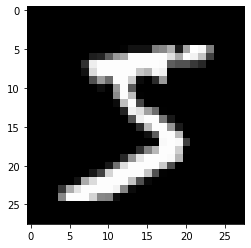

In [18]:
plt.imshow(image,'gray')
plt.show()

### channel 관련

In [19]:
# 데이터 차원 수 늘리기
expanded_data = np.expand_dims(train_x,0)
expanded_data.shape

(1, 60000, 28, 28)

In [20]:
# 데이터 차원 수 늘리기
expanded_data2 = np.expand_dims(train_x,1)
expanded_data2.shape

(60000, 1, 28, 28)

In [21]:
# tensorflow 패키지로 차원 수 늘리기
new_train_x = tf.expand_dims(train_x,-1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [22]:
# 이렇게 해도 OK
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [23]:
# 이것도 OK
reshaped = train_x.reshape([60000,28,28,1])
reshaped.shape

(60000, 28, 28, 1)

In [24]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

In [25]:
print( new_train_x[0].shape )
print( np.squeeze(new_train_x[0]).shape )

(28, 28, 1)
(28, 28)


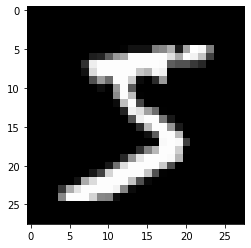

In [26]:
disp = new_train_x[0,:,:,0]
plt.imshow(disp,'gray')
plt.show()

### label dataset

In [27]:
# label 하나를 열어서, image와 비교! 제대로 들어갔는지
train_y.shape

(60000,)

In [28]:
train_y[0]

5

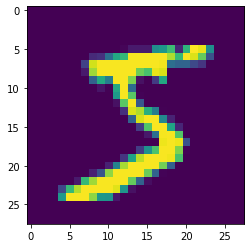

In [29]:
# 정답!
plt.imshow(train_x[0])
plt.show()

### one hot encoding

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
# 1을 예시로 one hot encoding
to_categorical(1,5)

array([0., 1., 0., 0., 0.], dtype=float32)

In [32]:
label = train_y[0]
label

5

In [33]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### input image
- [batch_size, height, width, channel]
- VALID : padding X
- SAME : padding O

In [34]:
image = train_x[0]
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [35]:
tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

In [36]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

### visualization
- tf.keras.layers.Conv2D

In [37]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [38]:
layer = tf.keras.layers.Conv2D(5,3,1,padding='SAME') # 5개의 3*3짜리 필터  ( stride는 1)
output = layer(image)

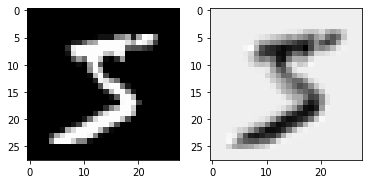

In [39]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')

plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')

plt.show()

### weight 불러오기
- layer.get_weights()

In [40]:
weight = layer.get_weights()

In [41]:
# 3*3*1필터 5개
# weight & bias
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

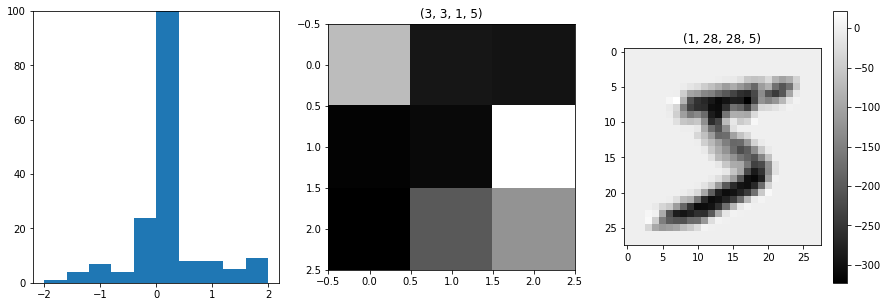

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

### Activation function

In [43]:
tf.keras.layers.ReLU()

In [44]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [45]:
np.min(output), np.max(output)

(-322.63394, 350.83237)

In [46]:
np.min(act_output), np.max(output)

(0.0, 350.83237)

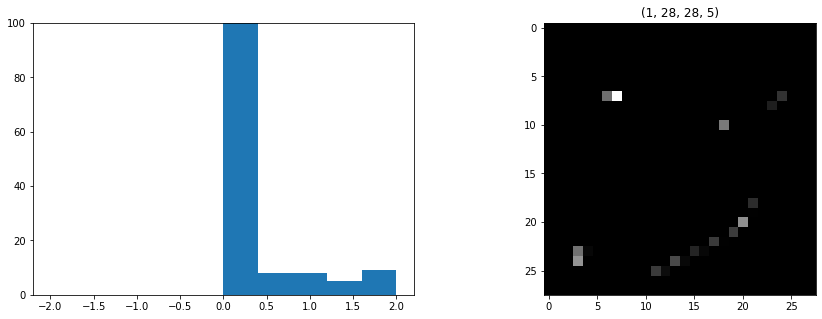

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')
plt.show()

### Pooling
- tf.keras.layers.MaxPool2D

In [48]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [49]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [50]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [51]:
pool_output.shape

TensorShape([1, 14, 14, 5])

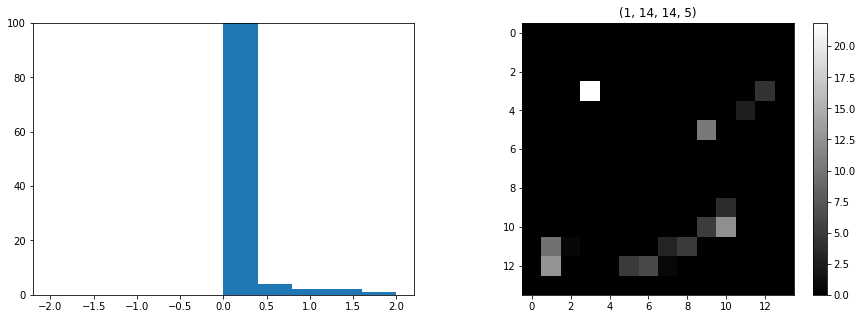

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

### Fully Connected

In [53]:
tf.keras.layers.Flatten()

In [54]:
layer = tf.keras.layers.Flatten()

In [55]:
flatten = layer(output)

In [56]:
# 차원이 1차원으로 축소되었다
# (1,3920)에서 1은 batch size 
# ( 한번에 이미지를 n개 넣으면, (n,3920)이 된다 )
output.shape, flatten.shape

(TensorShape([1, 28, 28, 5]), TensorShape([1, 3920]))

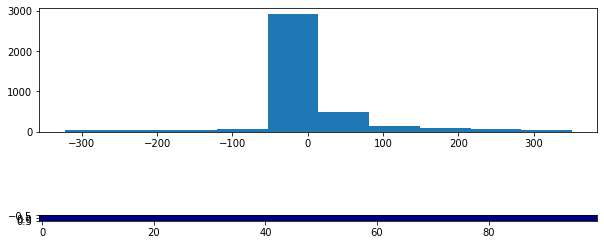

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())

plt.subplot(212)
plt.imshow(flatten[:,:100],'jet')
plt.show()

### Dense
- tf.keras.layers.Dense

In [58]:
# 32 : unit의 개수 ( = node의 개수 )
layer = tf.keras.layers.Dense(32,activation='relu')

In [59]:
output = layer(flatten)

In [60]:
# (1,3920)이 들어가서 (1,32)로 나옴!
output.shape

TensorShape([1, 32])

In [61]:
layer_2  = tf.keras.layers.Dense(10,activation='relu')
output_example = layer_2(output)

In [62]:
# (1,32)가 들어가서 (1,10)으로 나옴!
output_example.shape

TensorShape([1, 10])

### DropOut
- tf.keras.layers.Dropout

In [63]:
# 여기서는 '살릴 비율'
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [64]:
output.shape

TensorShape([1, 32])

### Build Layers

In [65]:
from tensorflow.keras import layers

In [66]:
input_shape = (28,28,1)
num_classes = 10

In [67]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [68]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0 

## Optimization
### 모델을 학습하기 전 설정
- Loss Function
- Optimization
- Metrics

### (1) Loss Function

- tf.keras.losses.sparse_categorical_crossentropy # one-hot인코딩 필요 없음
- tf.keras.losses.categorical_crossentropy # one-hot 인코딩 해야
- tf.keras.losses.binary_crossentropy

### (2) Metrics

In [70]:
metrics = [tf.keras.metrics.Accuracy()]
metrics2 = [tf.keras.metrics.Precision()]

### (3) Optimization

- tf.keras.optimizers.SGD()
- tf.keras.optimizers.RMSprop()
- tf.keras.optimizers.Adam()

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
             metrics=[tf.keras.metrics.Accuracy()]) # Recall / Precision

#### [new]

In [78]:
from keras_radam import RAdam

Using TensorFlow backend.


## Prepare Dataset

In [72]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [73]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [74]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

## Rescaling

In [75]:
train_x = train_x/255.
test_x = test_x/255.

In [76]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

## Training
- num_epochs
- batch_size

In [77]:
num_epochs=1
batch_size=32

In [78]:
model.fit(train_x,train_y,batch_size=batch_size,shuffle=True,epochs=num_epochs)

60000/60000 [==============================] - 286s 5ms/sample - loss: 0.1328 - accuracy: 3.5000e-05


## Summary

### 1) tf.data

In [122]:
train_x = (train_x / 255.0).astype('float32')
test_x = (test_x / 255.0).astype('float32')

train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_y))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((test_x,test_y))
test_ds = test_ds.batch(32)

### 2) visualize data

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

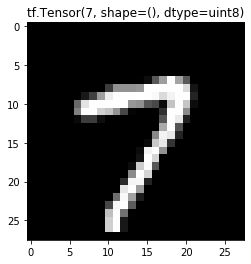

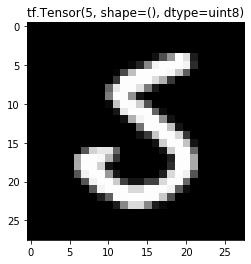

In [87]:
for image, label in train_ds.take(2):
    plt.title(label[0])
    plt.imshow(image[0,:,:,0], 'gray')
    plt.show()

### 3) training

- train_ds는 generator라서 그대로 넣을 수 있음

### 4) optimization

- Loss Function
- Optimizer

In [113]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

- Loss Function 담을 곳
- Metrics

In [141]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 4) training

In [142]:
def train_step(images, lables):
    with tf.GradientTape() as tape : # 학습 진행 과정에서, 기울기 기록
        predictions = model(images) # train 모드
        loss = loss_object(labels, predictions) # 오차 계산
    gradients = tape.gradient(loss, model.trainable_variables) # loss 통해 기울기를 얻어서 optimizer에 적용
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss) # loss 평균값 계산하도록
    train_accuracy(labels, predictions) # accuracy 계산

In [143]:
def test_step(images, labels):
    # 얘는 굳이 기울기 기록 X ( 어차피 test니까! )
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

### 5) evaluating

In [133]:
hist = model.fit(train_x, train_y,
                batch_size=64,
                shuffle=True)

60000/60000 [==============================] - 290s 5ms/sample - loss: 0.1418 - accuracy: 4.5000e-05


In [134]:
hist.history

{'loss': [0.14184501430019736], 'accuracy': [4.5e-05]}

In [135]:
model.evaluate(test_x, test_y, batch_size=64)

10000/10000 [==============================] - 9s 923us/sample - loss: 0.0326 - accuracy: 0.0000e+00


[0.03263399634417147, 0.0]

In [ ]:
# 결과 확인
test_image = test_x[0,:,:,0]
test_image.shape

In [ ]:
plt.imshow(test_image,'gray')
plt.show()

In [ ]:
pred = model.predict(test_image.reshape(1,28,28,1))
pred.shape

In [ ]:
np.argmax(pred)

In [ ]:
# 한번에 32개의 image를 test
test_batch = test_x[:32]
test_batch.shape

In [ ]:
preds model.predict(test_batch)
preds.shape

In [ ]:
np.argmax(preds, -1)

In [ ]:
plt.imshow(test_batch[0,:,:,0]),'gray'
plt.show()